## Exponential Weighted Averages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# create a dataset having 300 normally distributed data points with mean = 30 and std deviation = 1

x_300 = np.random.normal(size=300, loc=30)

In [ ]:
t = range(1,301)

<function matplotlib.pyplot.show>

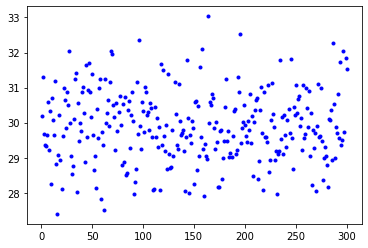

In [ ]:
plt.plot(t,x_300,'b.')
plt.show

In [ ]:
beta=0.9

v_300 = []
v = 0
for i in range(300):
  v = beta*v + (1-beta)* x_300[i]
  v_300.append(v)



In [ ]:
v_300 = np.array(v_300)

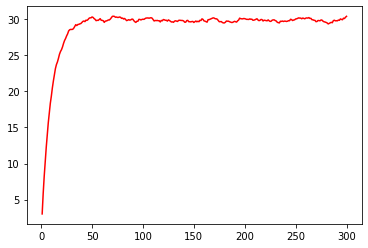

In [ ]:
plt.plot(t,v_300,'r')

In [ ]:
# Write a function that calculcates exponential weighted average


def plot_exponential_weighted_average (x,beta):
  v_exp = []
  v= 0 
  for i in range(x.shape[0]):
    v = beta*v + (1-beta)* x[i] 
    v_exp.append(v)
  plt.ylim(0,50)
  plt.plot(range(x.shape[0]),v_exp,'b' )
  plt.show()




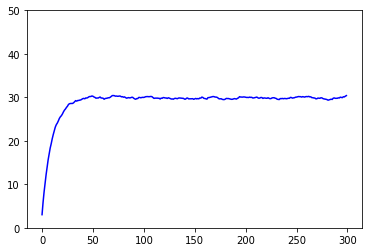

In [ ]:
plot_exponential_weighted_average(x_300,0.9)

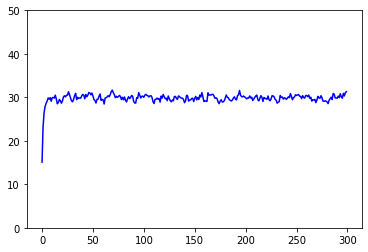

In [ ]:
# plot the curve for beta = 0.5 which is approximating the moving average over last 2 days

plot_exponential_weighted_average(x_300,0.5)

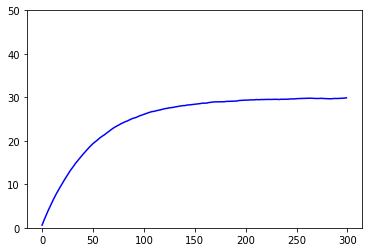

In [ ]:
# plot the curve for beta = 0.98 which is approximating the moving average over last 50 days

plot_exponential_weighted_average(x_300,0.98)

As you can see above:


*   Curve for beta = 0.98 is smooth as it approximates a sliding window over the 50 previous values

*   Curve for beta = 0.9 is slightly crooked as it approximates a sliding window over 10 previous values

*   Curve for beta = 0.5 is quite bumpy as it approximates a sliding window over the last 2 values



*  The initial values are all quite low and far from the actual values because the when previous are not available they are assumed to be zero. Because of this the curve takes some time to catch up the actual average of the values. This effect or lag is more pronounced beta = 0.98 which approximates a sliding window of 50 previous values. This effect is called "Bias" which needs to be corrected sometimes. 


*   A lot of times the bias is simply ignored but in some cases we may have correct for this bias in our data in the early part of the curve.









# Bias Correction




For Bias correction : 

instead of using v 

use

v/1-beta**i



## DIY: Edit the function defined above to use Bias correction

In [ ]:



def plot_bias_corrected_exponential_weighted_average (x,beta):
  v_exp = []
  v= 0 
  for i in range(x.shape[0]):
    v = beta*v + (1-beta)* x[i] 
    v_t = v/(1-beta**(i+1))
    v_exp.append(v_t)
  plt.ylim(0,50)
  plt.plot(range(x.shape[0]),v_exp,'b' )
  plt.show()
  return v_exp


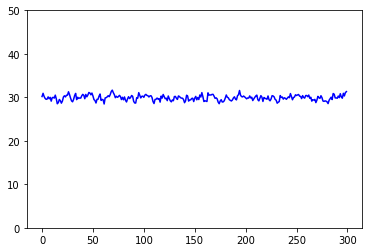

[30.188159515946207, 30.926433717970156, 30.21771319695324, 29.758609318368492, 29.54151988584287]


In [ ]:
# Approximate moving average over the last 2 values (beta = 0.5)

v_exp = plot_bias_corrected_exponential_weighted_average(x_300,0.5)

print (v_exp[:5])

In [ ]:
1/(1-0.98**(2))

25.252525252525203

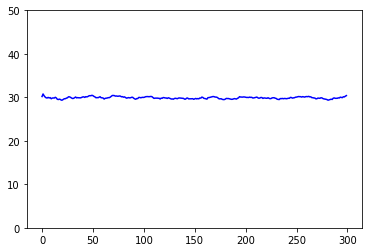

[30.188159515946207, 30.77100757017564, 30.370699539184837, 30.075902762628274, 29.895710772254862]


In [ ]:
# Approximate moving average over the last 10 values (beta = 0.9)


v_exp = plot_bias_corrected_exponential_weighted_average(x_300,0.9)

print (v_exp[:5])

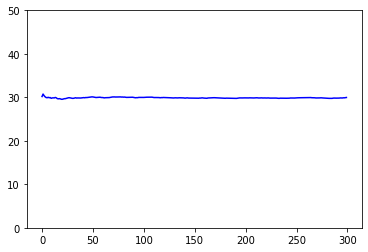

[30.188159515946207, 30.747458153843105, 30.386525849512903, 30.121265506615945, 29.958219407631276]


In [ ]:
# Approximate moving average over the last 50 values (beta = 0.98)


v_exp = plot_bias_corrected_exponential_weighted_average(x_300,0.98)

print (v_exp[:5])

In [ ]:
x_300[:5]

array([30.18815952, 31.29557082, 29.68617281, 29.35689342, 29.33799854])

As you can see with bias correction the average catches up the mean almost immediately.

The curve for sliding window over 50 previous values is almost a straight line.

The curve for sliding window over 10 previous values is slightly  bumpy.

The curve for sliding window over 2 previous values is quite  bumpy.
